**************************************************INITIALIZATION*********************************************************

In [1]:
from tjmonopix.tjmonopix import TJMonoPix
from tjmonopix.analysis.plotting import plotting
import time

plot=plotting()
chip = TJMonoPix()
chip['CONF']['DEF_CONF_N'] = 0
chip['CONF']['AB_SELECT'] = 1
chip['CONF'].write()
chip.init()

# chip['data_rx'].CONF_START_FREEZE = 15 #default 3
# chip['data_rx'].CONF_STOP_FREEZE = 100 #default 40
# #chip['data_rx'].CONF_STOP_FREEZE = 250 #default 40
# chip['data_rx'].CONF_START_READ = 35 #default 6
# chip['data_rx'].CONF_STOP_READ = 37 #default 7
# chip['data_rx'].CONF_STOP = 105 #default 45
# #chip['data_rx'].CONF_STOP = 255 #default 45

chip['data_rx'].CONF_START_FREEZE = 64 #default 3
chip['data_rx'].CONF_STOP_FREEZE = 100 #default 40
chip['data_rx'].CONF_START_READ = 66 #default 6
chip['data_rx'].CONF_STOP_READ = 68 #default 7
chip['data_rx'].CONF_STOP = 105 #default 45

chip.power_on()

chip['CONF']['RESET_BCID'] = 1
chip['CONF']['RESET'] = 1
chip['CONF'].write()

chip['CONF']['EN_BX_CLK'] = 1
chip['CONF']['EN_OUT_CLK'] = 1
chip['CONF'].write()
 
chip['CONF']['RESET_BCID'] = 0
chip['CONF']['RESET'] = 0
chip['CONF'].write()

chip.default_conf()

#-------------------------------------------------#
chip.set_icasn_dacunits(0,0)
chip.set_vreset_dacunits(35,0)
chip.set_ireset_dacunits(2,1,0)
chip.set_ithr_dacunits(5,0)
chip.set_idb_dacunits(50,0)

chip['CONF_SR']['EN_HV'].setall(False)
chip['CONF_SR']['EN_COMP'].setall(False)
chip['CONF_SR']['EN_PMOS'].setall(False)
chip['CONF_SR']['EN_PMOS_NOSF'].setall(False)
chip['CONF_SR']['EN_TEST_PATTERN'].setall(False)

chip['CONF_SR']['MASKD'].setall(False)
chip['CONF_SR']['MASKH'].setall(False)
chip['CONF_SR']['MASKV'].setall(False)

chip.write_conf()

chip['CONF']['DEF_CONF_N'] = 1
chip['CONF'].write()

2018-04-23 16:22:38,403 - [root           ] - ERROR   'NoneType' object has no attribute 'WriteExternal'
2018-04-23 16:22:38,434 - [root           ] - INFO    Found USB board(s): USBpix with ID 207 (FW 15)
2018-04-23 16:22:38,437 - [root           ] - INFO    Programming FPGA: tjmonopix_mio.bit...
2018-04-23 16:22:46,407 - [root           ] - INFO    Success!
2018-04-23 16:22:46,825 - [root           ] - INFO    Found adapter card: General Purpose Analog Card with ID 1
2018-04-23 16:22:46,849 - [root           ] - INFO    Initializing fifo (firmware version: 2), module basil.HL.sram_fifo, base_addr 0x18000
2018-04-23 16:22:46,853 - [root           ] - INFO    Initializing gpio (firmware version: 0), module basil.HL.gpio, base_addr 0x10000
2018-04-23 16:22:46,857 - [root           ] - INFO    Initializing spi (firmware version: 2), module basil.HL.spi, base_addr 0x11000
2018-04-23 16:22:46,861 - [root           ] - INFO    Initializing inj (firmware version: 3), module basil.HL.pulse_ge

4098


****************************************************POWER_STATUS*********************************************************

In [2]:
#chip['BiasSF'].set_current(100, unit='uA') # SET THE SOURCE FOLLOWER READOUT CURRENT
chip.get_power_status()

{'VDDA [V]': 1.7935596696606788,
 'VDDA [mA]': 57.39915495671369,
 'VDDA_DAC [V]': 1.798314513944223,
 'VDDA_DAC [mA]': 3.53162464064632,
 'VDDD [V]': 1.799759839679359,
 'VDDD [mA]': -3.3934469967968035e-08,
 'VDDP [V]': 1.7947520410410414,
 'VDDP [mA]': 156.8063353962533}

****************************ENABLE_COLUMS, SET MASKS, SELECT WHICH COLUMN AND ROW TO INJECT******************************

In [131]:
# SELECT WHICH DOUBLE COLUMNS TO ENABLE
chip['CONF_SR']['EN_PMOS_NOSF'].setall(False)
chip['CONF_SR']['EN_PMOS'].setall(False)
chip['CONF_SR']['EN_COMP'].setall(False)
chip['CONF_SR']['EN_HV'].setall(False)
chip['CONF_SR']['EN_OUT'].setall(False) #ENABLES OR DISABLES THE NORMAL OUTPUT PADS, ACTIVE LOW
chip['CONF_SR']['nEN_OUT'].setall(True) #ENABLES OR DISABLES THE COMPLEMENTARY OUTPUT PADS, ACTIVE LOW
chip['CONF_SR']['EN_HITOR_OUT'].setall(True) #ENABLES OR DISABLES THE NORMAL HITOR PADS, HITOR0-3 =  1-4 flavor, ACTIVE LOW
chip['CONF_SR']['nEN_HITOR_OUT'].setall(True) #ENABLES OR DISABLES THE COMPLEMENTARY HITOR PADS, ACTIVE LOW

#chip['CONF_SR']['EN_HV'][9] = 1
chip['CONF_SR']['EN_HV'].setall(True)
#chip['CONF_SR']['EN_HITOR_OUT'][1] = 0

# SELECT WHICH PHYSICAL COLUMNS, ROWS, DIAGONALS TO MASK
# TO MASK ONE PIXEL, MASKV, MASKH and MASKD OF THIS PIXEL SHOULD BE 0 (FALSE)
# THE MASKD NUMBER OF THE PIXEL WE WANT TO MASK (or UNMASK), IS GIVEN BY: MASKD = PHYSCOL- PHYSROW
# IF PHYSCOL-PHYSROW<0, then MASKD = 448+PHYSCOL-PHYSROW
chip['CONF_SR']['MASKD'].setall(True)
chip['CONF_SR']['MASKH'].setall(True)
chip['CONF_SR']['MASKV'].setall(True)

# TO USE THE MASK FUNCTION YOU MUST INPUT THE FLAVOR, COLUMN AND ROW
# THE FLAVOR NUMERS IS: 0 FOR PMOS_NOSF, 1 FOR PMOS, 2 FOR COMP, 3 FOR HV

# chip.mask(3,10,30)
# chip.mask(3,9,131)
# chip.mask(3,72,70)
# chip.mask(3,36,46)
# chip.mask(3,80,44)
# chip.mask(3,80,55)
# chip.mask(3,21,119)
# chip.mask(3,104,109)
# chip.mask(3,6,119)
# chip.mask(3,87,166)
# chip.mask(3,82,178)
# chip.mask(3,35,172)
# chip.mask(3,56,118)
# chip.mask(3,42,67)
# chip.mask(3,110,48)
# chip.mask(3,16,178)
# chip.mask(3,25,94)
# chip.mask(3,46,109)
# chip.mask(3,47,59)
# chip.mask(3,48,194)
# chip.mask(3,93,191)
# chip.mask(3,106,202)
# chip.mask(3,61,181)
# chip.mask(3,83,146)
# chip.mask(3,42,7)
# chip.mask(3,85,57)
# chip.mask(3,101,167)
# chip.mask(3,65,143)
# chip.mask(3,43,201)
# chip.mask(3,3,18)
# chip.mask(3,79,214)
# chip.mask(3,13,158)
# chip.mask(3,42,163)
# chip.mask(3,52,43)
# chip.mask(3,56,144)

# #Extra for PWELL=0
# chip.mask(3,109,103)
# chip.mask(3,82,79)
# chip.mask(3,5,69)
# chip.mask(3,94,99)
# chip.mask(3,105,8)
# chip.mask(3,59,16)
# chip.mask(3,31,69)
# chip.mask(3,70,166)
#W12#---------------------------------------------#
# chip.mask(3,63,202)
# chip.mask(3,16,3)
# chip.mask(3,72,22)
# chip.mask(3,1,203)
# chip.mask(3,102,152)
# chip.mask(3,49,138)
# chip.mask(3,29,63)
# chip.mask(3,29,72)
# chip.mask(3,29,114)
# chip.mask(3,69,111)
# chip.mask(3,64,46)
# chip.mask(3,52,101)
# chip.mask(3,17,97)
# chip.mask(3,60,218)
# chip.mask(3,66,78)
# chip.mask(3,69,133)
# chip.mask(3,41,9)
# chip.mask(3,46,71)
# chip.mask(3,31,142)
# chip.mask(3,37,121)
# chip.mask(3,35,145)
# chip.mask(3,31,16)
# chip.mask(3,76,139)
# chip.mask(3,21,66)
# chip.mask(3,37,151)
# chip.mask(3,26,95)
# chip.mask(3,51,102)
# chip.mask(3,107,45)
# chip.mask(3,39,175)
# chip.mask(3,50,12)
# chip.mask(3,70,120)
# chip.mask(3,82,9)

# chip.mask(3,74,213)
# chip.mask(3,15,66)
# chip.mask(3,62,118)
# chip.mask(3,103,87)
# chip.mask(3,103,143)
# chip.mask(3,84,62)

#W4_CHR#---------------------------------------------#
chip.mask(3,71,49)
chip.mask(3,15,18)
chip.mask(3,81,194)
chip.mask(3,49,27)
chip.mask(3,37,202)
chip.mask(3,28,221)
chip.mask(3,9,169)
chip.mask(3,72,210)
chip.mask(3,10,117)
chip.mask(3,94,194)
chip.mask(3,90,91)
chip.mask(3,6,120)
chip.mask(3,15,120)
chip.mask(3,72,93)
chip.mask(3,97,168)
chip.mask(3,100,169)
chip.mask(3,39,108)
chip.mask(3,45,185)
chip.mask(3,1,86)
chip.mask(3,38,151)
chip.mask(3,19,58)
chip.mask(3,89,179)
chip.mask(3,76,53)
chip.mask(3,11,122)
chip.mask(3,19,195)
chip.mask(3,64,186)

chip.mask(3,9,139)
chip.mask(3,71,199)
chip.mask(3,71,202)
chip.mask(3,99,136)
chip.mask(3,90,9)
chip.mask(3,109,166)
chip.mask(3,62,112)

#newW12#---------------------------------------------#
# chip.mask(3,88,39)
# chip.mask(3,19,161)
# chip.mask(3,95,193)
# chip.mask(3,92,13)
# chip.mask(3,37,203)
# chip.mask(3,21,200)
# chip.mask(3,2,143)
# chip.mask(3,2,143)
# chip.mask(3,76,164)
# chip.mask(3,56,48)
# chip.mask(3,45,137)
# chip.mask(3,41,73)
# chip.mask(3,60,94)
# chip.mask(3,111,77)  
# chip.mask(3,111,68)
# chip.mask(3,23,151)
# chip.mask(3,49,168)
# chip.mask(3,80,223)
# chip.mask(3,74,48)
# chip.mask(3,6,91)

# chip.mask(3,7,42)
# chip.mask(3,108,167)
# chip.mask(3,24,134)
# chip.mask(3,106,197)
# chip.mask(3,76,111)
# chip.mask(3,59,19)
# chip.mask(3,37,63)
# chip.mask(3,104,31)
# chip.mask(3,62,174)
# chip.mask(3,99,76)
# chip.mask(3,31,112)
# chip.mask(3,26,198)
# chip.mask(3,78,14)
# chip.mask(3,71,209)
# chip.mask(3,96,57)
# chip.mask(3,110,209)
# chip.mask(3,107,73)
chip.mask(3,26,179)

#chip['CONF_SR']['MASKD'][31] = True
#chip['CONF_SR']['MASKH'][99] = False

# SELECT WHICH PHYSICAL COLUMS TO INJECT
# INJ_IN_MON_L AND INJ_IN_MON_L SELECT THE LEFT AND RIGHT SPECIAL ANALOG MONITORING PIXELS
chip['CONF_SR']['COL_PULSE_SEL'].setall(False)
#chip['CONF_SR']['COL_PULSE_SEL'][130]=True

chip['CONF_SR']['INJ_IN_MON_L'] = 1 # ENABLE INJECTION FOR THE ANALOG MONITORING PIXELS LEFT SIDE
chip['CONF_SR']['INJ_IN_MON_R'] = 1 # ENABLE INJECTION FOR THE ANALOG MONITORING PIXELS RIGHT SIDE

# SELECT WHICH PHYSICAL ROWS TO INJECT
# THE SPEXIAL PIXELS OUTA_MON3 to OUTA_MON0 CORRESPONT TO ROWS 223 to 220 FOR INJECTION
chip['CONF_SR']['INJ_ROW'].setall(False)
chip['CONF_SR']['INJ_ROW'][223:220] = True # FOR THE ANALOG MONITORING TOP PIXEL

# SELECT PHYSICAL COLUMNS AND ROWS FOR INJECTION WITH FUNCTION
chip.enable_injection(3,18,99)

# SELECT PHYSICAL COLUMN(S) FOR HITOR OUTPUT
# nMASKH (SO SETTING MASKH TO FALSE) ENABLES HITOR FOR THE SPECIFIC ROW
chip['CONF_SR']['DIG_MON_SEL'].setall(False)
#chip.enable_column_hitor(1,18)

chip.write_conf()

In [120]:
# chip['data_rx'].CONF_START_FREEZE = 64 #default 3
# chip['data_rx'].CONF_STOP_FREEZE = 100 #default 40
# chip['data_rx'].CONF_START_READ = 66 #default 6
# chip['data_rx'].CONF_STOP_READ = 68 #default 7
# chip['data_rx'].CONF_STOP = 105 #default 45

#chip['data_rx'].reset()
#chip['CONF']['AB_SELECT'] = 1
#chip['CONF'].write()

chip['data_rx'].set_en(True)

x = chip['fifo'].get_data()

ix = chip.interprete_data(x)
print(len(ix))
print(ix)

0
[]


In [75]:
chip['CONF_SR']['MASKD'].setall(False)
chip['CONF_SR']['MASKH'].setall(False)
chip['CONF_SR']['MASKV'].setall(False)
chip.write_conf()

In [ ]:
#chip['CONF_SR']['EN_HV'].setall(False)
chip['CONF_SR']['EN_HV'].setall(True)
#chip['CONF_SR']['EN_HV'][20:0] = True
chip.write_conf()

In [129]:
chip['CONF_SR']['MASKD'].setall(False)
chip['CONF_SR']['MASKH'].setall(False)
chip['CONF_SR']['MASKV'].setall(False)
chip['CONF_SR']['EN_HV'].setall(False)
chip.write_conf()

In [ ]:
chip['CONF_SR']['MASKV'].setall(True)
chip['CONF_SR']['MASKH'].setall(True)
chip.write_conf()

In [ ]:
chip['CONF_SR']['MASKD'][448:224]=True
time.sleep(0.1)
chip['CONF_SR']['MASKD'][223:0]=True

In [ ]:
chip['CONF']['RESET_BCID'] = 1
chip['CONF']['RESET'] = 1
chip['CONF'].write()

time.sleep(2)

chip['CONF']['RESET_BCID'] = 0
chip['CONF']['RESET'] = 0
chip['CONF'].write()

************CONFIGURE THE FRONT END CURRENT AND VOLTAGE BIASES, CONFIGURE THE HEIGHT OF THE INJECTION PULSE**************

In [130]:
## SET THE INJECTION PULSE AMPLITUDE
## 128-bit DAC (7-bit binary equivalent)
## SET THE VOLTAGES IN ONE HOT ENCODING, ONLY ONE BIT ACTIVE AT A TIME.
## V = (127/1.8)*#BIT
# The default values are VL=44, VH=79, VH-VL=35
# VDAC LSB=14.17mV, Cinj=230aF, 1.43e-/mV, ~710e-
chip.set_vl_dacunits(40,1)
chip.set_vh_dacunits(40,1)

####### CONFIGURE THE FRONT END ######

# SET VRESET_P, THIS IS THE BASELINE OF THE FRONT END INPUT, ONE HOT ENCODING
chip.set_vreset_dacunits(35,1) #1V

## 128-bit DAC (7-bit binary equivalent)
## SET THE CURRENTS USING THERMOMETER ENCODING, I = #BITS_ACTIVE*140nA*SCALING, SCALING IS DIFFERENT FOR EACH CURRENT
## SCALING: IBIAS=10, IDB=16, ITHR=0.125, ICASN=4, IRESET=0.03125
## ACTIVE BITS SHOULD BE SET STARTING FROM THE MIDDLE e.g. for 15 active bits, (128-15)/2=56,5 so 56zeros,15ones,57zeros
## Thus, Ix[71:57] = True

# SET ICASN, THIS CURRENT CONTROLS THE OUTPUT BASELINE, BE CAREFUL NOT TO SET IT TO HIGH
# ALWAYS MONITOR THE POWER AFTER SETTING ICASN. IF VDDD IS SEVERAL mA, REDUCE IT UNTIL IT RETURNS TO 0
# ICASN MAINLY CONTROLS THE THRESHOLD
chip.set_icasn_dacunits(0,1) #4.375nA # approx 1.084V at -3V backbias, 600mV at 0V backbias

# SET IRESET, THIS CURRENT CONTROLS THE RESET RATE OF THE FRONT END INPUT (ALSO THE THRESHOLD)
chip.set_ireset_dacunits(2,1,1) #270pA, HIGH LEAKAGE MODE, NORMAL SCALING, 0 = LOW LEAKAGE MODE, SCALING*0.01

# SET ITHR, THIS CURRENT CONTROLS THE RESET RATE OF THE OUTPUT (AND THE THRESHOLD)
chip.set_ithr_dacunits(5,1) #680pA

# SET ITHR, THIS CURRENT CONTROLS THE BIASING OF THE DISCRIMINATOR (AND THE THRESHOLD)
chip.set_idb_dacunits(20,1) #500nA

# SET IBIAS, THIS CURRENT IS THE DC CURRENT OF THE MAIN BRANCH OF THE FRONT END THAT PROVIDES AMPLIFICATION
# IT CONTROLS MAINLY THE RISE TIME
chip.set_ibias_dacunits(50,1) #500nA

############ ENABLE THE DAC CURRENT MONITORING ###########
# chip['CONF_SR']['SWCNTL_DACMONI'] = 0

########## SET THE BIAS CURRENTS OF THE TWO STAGE SOURCE FOLLOWER THAT BUFFERS THE ANALOG MONITORING VOLTAGES #########
# CONTROLS THE RESPONSE TIME AND THE LEVEL SHIFT OF THE BUFFER
# chip['CONF_SR']['SET_IBUFN_L'] = 0b1001
# chip['CONF_SR']['SET_IBUFP_L'] = 0b0101

chip.write_conf()

vl = 0.951929133858V
vh = 0.951929133858V
vreset = 1.05106299213V
icasn = 4.375nA
ireset = 0.1025390625nA, high leakage mode
ithr = 0.8203125nA
idb = 367.5nA
ibias = 557.8125nA


In [128]:
x = chip['fifo'].get_data()

ix = chip.interprete_data(x)
print(len(ix))
print(ix)

146012
[(25, 199, 19, 40, 0) (24, 198, 38, 52, 0) (25, 198, 10, 40, 0) ...
 ( 8,  72, 10, 10, 0) ( 9,  72, 61, 26, 0) ( 8,  71, 14, 34, 0)]


In [70]:
chip['DACMON_ICASN'].set_current(0, unit='uA')
chip['CONF_SR']['SWCNTL_ICASN']=False
chip.write_conf()

In [ ]:
print chip['DACMON_ICASN'].get_voltage()
print chip['DACMON_ICASN'].get_current()

******************INITIALIZE COMMUNICATION, RECEIVE DATA (CHECK IF DATA ARE SENT WITH EACH EXCECUTION)*******************

****************************SET THE INJECTION PULSE PARAMETERS, INJECT x times and get the data**************************

In [67]:
chip['CONF_SR']['COL_PULSE_SEL'].setall(False)
chip['CONF_SR']['INJ_ROW'].setall(False)
chip['CONF_SR']['INJ_ROW'][223:220]=True
for row in range(80,100):
    chip.enable_injection(3,18,row)

chip.write_conf()

In [141]:
import numpy as np

#chip['inj'].reset()

repeat=1000
sleeptime=repeat*0.00003
delay=800
width=250
noise_en=0
col=18
row=99

chip['inj'].set_delay(delay)
chip['inj'].set_width(width)
chip['inj'].set_repeat(repeat)
chip['inj'].set_en(0)

while not chip['inj'].is_ready:
    time.sleep(0.001)

for _ in range(10):
    chip['inj'].is_ready

chip["inj"].start()
time.sleep(sleeptime)

x = chip['fifo'].get_data()
ix = chip.interprete_data(x)

print(len(ix))
#print(ix)

ixd=np.delete(ix, np.where((ix['col']!=col)|(ix['row']!=row))[0])
uniquerow, countrow = np.unique(ixd['row'], return_counts=True)
if countrow.size !=0:
    print col, uniquerow[0], countrow[0]

146079
18 99 7


******************************************INJECTION SCANS -  S-CURVE*****************************************************

[[  0   0   0   0   0   0   0   0   0   1  16  63 311 473 496 500 500 500
  500 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500
  500 500 500 500 500]]


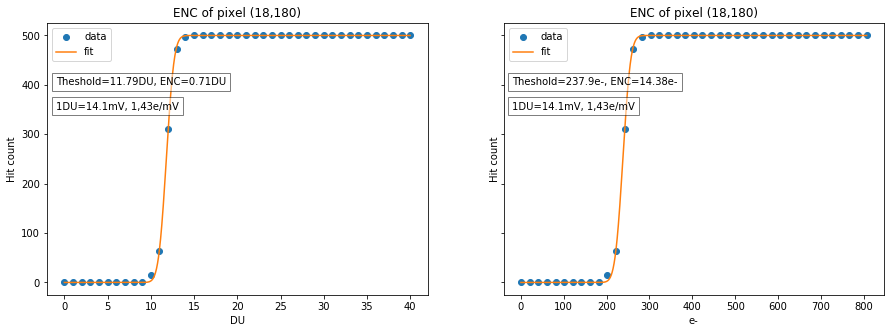

In [143]:
%matplotlib inline
import numpy as np

flavor=3
col=18
startrow=180
rownumber=1
VL=40
VHLrange=40
start_dif=0
repeat=500
delay=500
width=250
noise_en=0
analog_en=1
sleeptime=repeat*0.00005
DUtoe=20.18
#DUtoe=23

xhits = range(start_dif,VHLrange+start_dif+1)

hits =chip.inj_scan_row(flavor, col, startrow, rownumber, VL, VHLrange, start_dif, delay, width, repeat, noise_en, analog_en, sleeptime)
print hits
plot.plot_scurve(col, startrow, xhits, hits[0], repeat, VHLrange/2+start_dif, 0.5, 10.0, DUtoe,False)

In [ ]:
flavor=3
partname='top'
col_high = 111
col_low = 0
row_high = None
row_low = None
rowstep=20

VL=40
VHLrange=40
start_dif=0
delay=1500
width=350
repeat=500
noise_en=0
analog_en=1
sleeptime=repeat*0.00005
sleeptime_step=0.01

chip.inj_scan(flavor, col_high, col_low, row_high, row_low, rowstep, VL, VHLrange, start_dif, delay, width, repeat, noise_en, analog_en, sleeptime, sleeptime_step, partname)

In [ ]:
flavor=3
partname='bot'
col_high = 111
col_low = 0
row_high = None
row_low = None
rowstep=20

VL=40
VHLrange=40
start_dif=0
delay=1500
width=350
repeat=500
noise_en=0
analog_en=1
sleeptime=repeat*0.00005
sleeptime_step=0.01

chip.inj_scan(flavor, col_high, col_low, row_high, row_low, rowstep, VL, VHLrange, start_dif, delay, width, repeat, noise_en, analog_en, sleeptime, sleeptime_step, partname)